In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/multiclass-text-classification/dataset/sample_submission.csv
/kaggle/input/multiclass-text-classification/dataset/test_file.csv
/kaggle/input/multiclass-text-classification/dataset/train_file.csv


In [2]:
train_df1 = pd.read_csv('../input/multiclass-text-classification/dataset/train_file.csv')
train_df1.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL


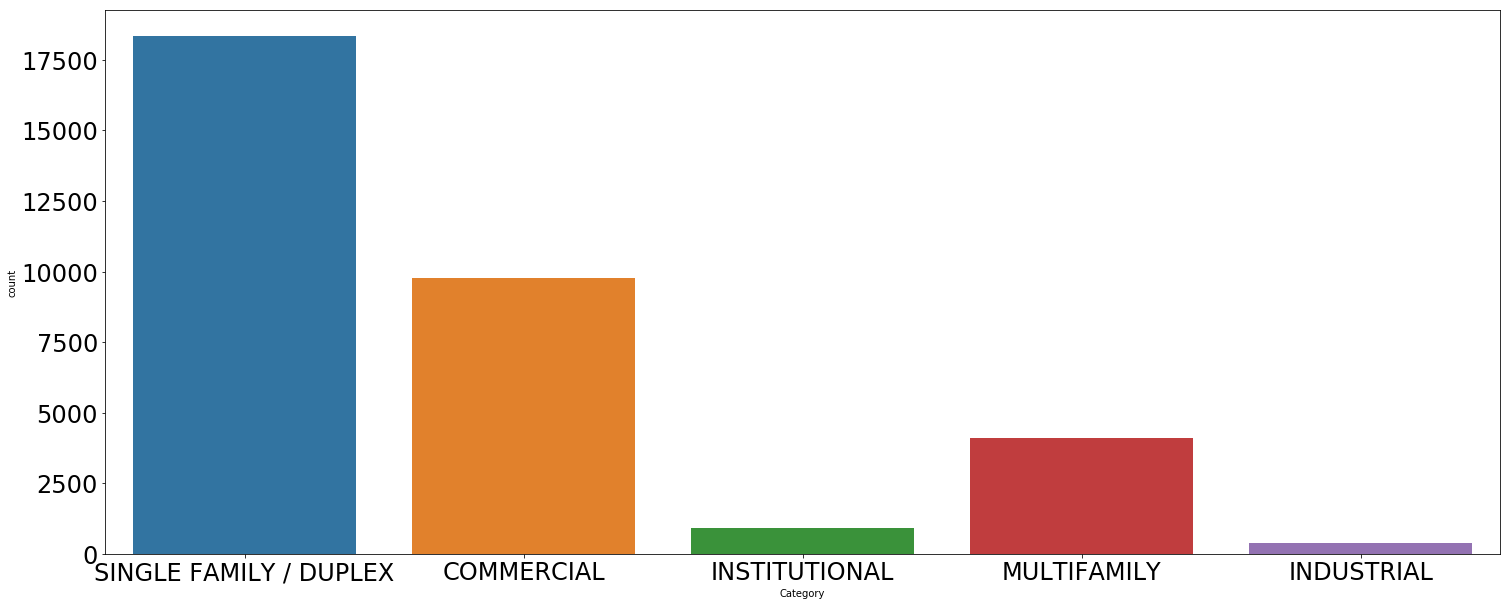

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

%matplotlib inline


# Distribution of the target variable
plt.figure(figsize=(25,10))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=train_df1, x='Category')

In [4]:
category = {
        'SINGLE FAMILY / DUPLEX': 1,
        'COMMERCIAL': 2,
        'MULTIFAMILY': 3,
        'INSTITUTIONAL': 4,
        'INDUSTRIAL': 5
    }
train_df1['Category'] = train_df1['Category'].apply(lambda a: category[a])
train_df1.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",1
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",2
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",2
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",2
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",2


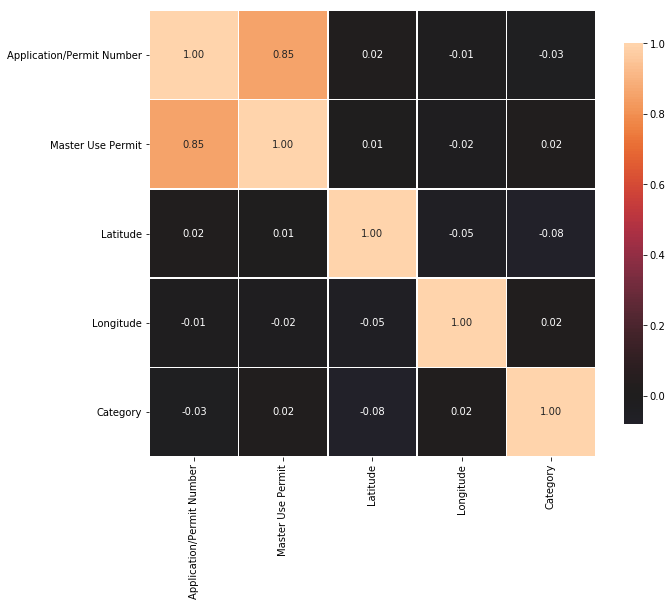

In [5]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_df1)

In [6]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


In [7]:

for col in train_df1.columns:
    if col != 'Category':
        train_df1[col] = train_df1[col].apply(lambda a: model.infer_vector([str(a)]))

train_df1.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,"[0.07567944, -0.016532099, 0.057338435, -0.047...","[0.08717826, 0.06525887, -0.056348607, -0.0466...","[0.08442456, 0.09636989, -0.0861237, -0.057741...","[-0.0013642391, -0.049637556, -0.09309274, 0.0...","[-0.019721273, -0.018495433, 0.057365533, 0.05...","[-0.080607764, -0.03626149, 0.06762358, 0.0613...","[0.0016658141, 0.09771441, 0.08596662, 0.08239...","[0.008561118, 0.0015589165, 0.048452374, -0.06...","[0.008561118, 0.0015589165, 0.048452374, -0.06...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.046756558, -0.09544869, -0.06752841, -0.04...","[-0.047940865, 0.061699662, -0.004307388, 0.03...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.005664125, -0.06761407, -0.059711386, 0.08...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.04739427, -0.011642386, 0.02352936, -0.0516...","[-0.02148193, 0.05759012, 0.001552718, 0.08646...","[0.02830844, -0.06749663, -0.09645206, 0.01723...",1
1,"[-0.06802486, -0.019574273, -0.064042486, -0.0...","[0.08717826, 0.06525887, -0.056348607, -0.0466...","[-0.019731557, 0.09993348, -0.013483409, 0.060...","[0.05223177, 0.05622537, 0.034758355, -0.09293...","[-0.019721273, -0.018495433, 0.057365533, 0.05...","[-0.082535475, 0.007664747, 0.017969357, -0.05...","[-0.09752663, -0.09253057, 0.059593048, 0.0615...","[0.08187647, 0.00016653285, -0.09657816, -0.07...","[-0.019152585, 0.054946966, -0.07130409, -0.05...","[-0.0033491259, -0.096953474, -0.02895478, -0....","[0.040375568, -0.03754108, -0.0047107856, -0.0...","[0.09367579, 0.04663541, -0.09357734, -0.02527...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.051089488, 0.092337534, -0.05942883, -0.00...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.08752781, 0.0653699, 0.040937643, 0.098382...","[0.030722382, -0.08417115, -0.00882991, -0.069...","[-0.0037593949, -0.08889692, 0.07515967, 0.014...",2
2,"[-0.060443666, 0.016508536, 0.011103894, 0.043...","[0.08717826, 0.06525887, -0.056348607, -0.0466...","[0.07869002, -0.07085943, -0.03362455, 0.00690...","[-0.091642335, -0.005097151, -0.09300295, 0.07...","[-0.019721273, -0.018495433, 0.057365533, 0.05...","[-0.080607764, -0.03626149, 0.06762358, 0.0613...","[0.00665824, 0.00997223, -0.042278573, 0.09637...","[0.08659479, -0.055185847, -0.059757072, 0.041...","[0.08659479, -0.055185847, -0.059757072, 0.041...","[0.006308086, 0.08570733, -0.06816285, -0.0610...","[0.06252295, 0.04312218, -0.07723899, -0.04415...","[0.09367579, 0.04663541, -0.09357734, -0.02527...","[-0.0871967, 0.057743426, -0.051796146, -0.076...","[0.011975518, 0.015036061, 0.04483295, -0.0782...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.061005898, -0.09075291, -0.044939782, -0.04...","[-0.047108833, 0.005676808, 0.054521076, 0.089...","[0.0673328, 0.096562125, -0.0010397644, 0.0673...",2
3,"[0.06729966, 0.09942728, -0.03180893, -0.01174...","[0.021592103, 0.04391313, 0.07712342, 0.050677...","[-0.006868353, 0.036429852, -0.052307386, -0.0...","[0.012303262, 0.0010209405, -0.029194983, -0.0...","[-0.06062614, -0.054197285, 0.0170851, 0.06222...","[-0.082535475, 0.007664747, 0.017969357, -0.05...","[0.059168402, -0.034537006, 0.033604983, 0.067...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.018889068, -0.06721055, 0.035145022, -0.00...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[-0.07197351, 0.051746402, -0.006142071, 0.005...","[0.040538523, 0.07816871, -0.013748948, 0.0163...","[0.0129257655, -0.046903253, -0.08087137, 0.06...","[0.07475908, -0.0024006516, 0.050903562, 0.039...","[-0.09943651, 0.0141873155, -0.031756

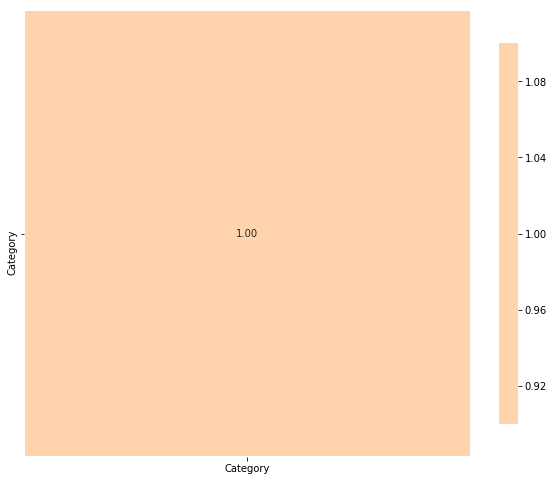

In [8]:
correlation_heatmap(train_df1)